## Import Libraries

In [1]:
# Load libraries
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# User libraries
import FootballDB as fdb
import Features as features

In [2]:
# Pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
# Matplotlib Options
%matplotlib notebook

## Load Data

In [3]:
# Load dataframe
df = features.load_dataframe()
df

,AwayTeam,Date,Div,FTAG,FTHG,FTR,HomeTeam,Source,Season,AC,AF,AR,AS,AST,AY,HC,HF,HR,HS,HST,HTAG,HTHG,HTR,HY,Referee
0,Aston Villa,2015-08-08,E0,1.0,0.0,A,Bournemouth,football-data-uk,1516,3.0,13.0,0.0,7.0,3.0,4.0,6.0,13.0,0.0,11.0,2.0,0.0,0.0,D,3.0,M Clattenburg
1,Swansea,2015-08-08,E0,2.0,2.0,D,Chelsea,football-data-uk,1516,8.0,16.0,0.0,18.0,10.0,3.0,4.0,15.0,1.0,11.0,3.0,1.0,2.0,H,1.0,M Oliver
2,Watford,2015-08-08,E0,2.0,2.0,D,Everton,football-data-uk,1516,2.0,13.0,0.0,11.0,5.0,2.0,8.0,7.0,0.0,10.0,5.0,1.0,0.0,A,1.0,M Jones
3,Sunderland,2015-08-08,E0,2.0,4.0,H,Leicester,football-data-uk,1516,3.0,17.0,0.0,10.0,5.0,4.0,6.0,13.0,0.0,19.0,8.0,0.0,3.0,H,2.0,L Mason
4,Tottenham,2015-08-08,E0,0.0,1.0,H,Man United,football-data-uk,1516,2.0,12.0,0.0,9.0,4.0,3.0,1.0,12.0,0.0,9.0,1.0,0.0,1.0,H,2.0,J Moss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17703,Fulham,2008-05-11,E0,1.0,0.0,A,Portsmouth,football-data-uk,0708,6.0,11.0,0.0,7.0,4.0,0.0,5.0,13.0,0.0,15.0,10.0,0.0,0.0,D,0.0,M Clattenburg
17704,Arsenal,2008-05-11,E0,1.0,0.0,A,Sunderland,football-data-uk,0708,4.0,12.0,0.0,12.0,8.0,1.0,3.0,14.0,0.0,13.0,5.0,1.0,0.0,A,1.0,K Stroud
17705,Liverpool,2008-05-11,E0,2.0,0.0,A,Tottenham,football-data-uk,0708,4.0,9.0,0.0,18.0,12.0,1.0,8.0,11.0,0.0,6.0,3.0,0.0,0.0,D,1.0,U Rennie
17706,Aston Villa,2008-05-11,E0,2.0,2.0,D,West Ham,football-data-uk,0708,8.0,21.0,0.0,13.0,8.0,2.0,7.0,9.0,0.0,16.0,8.0,1.0,1.0,D,2.0,M Dean


In [4]:
# Check missing data
missing_df = df.isna()
missing_df.apply(sum,axis='rows')

AwayTeam    0
Date        0
Div         0
FTAG        0
FTHG        0
FTR         0
HomeTeam    0
Source      0
Season      0
AC          0
AF          0
AR          0
AS          0
AST         0
AY          0
HC          0
HF          0
HR          0
HS          0
HST         0
HTAG        0
HTHG        0
HTR         0
HY          0
Referee     0
dtype: int64

## Summary Statitistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17708 entries, 0 to 17707
Data columns (total 25 columns):
AwayTeam    17708 non-null object
Date        17708 non-null datetime64[ns]
Div         17708 non-null object
FTAG        17708 non-null float64
FTHG        17708 non-null float64
FTR         17708 non-null object
HomeTeam    17708 non-null object
Source      17708 non-null object
Season      17708 non-null object
AC          17708 non-null float64
AF          17708 non-null float64
AR          17708 non-null float64
AS          17708 non-null float64
AST         17708 non-null float64
AY          17708 non-null float64
HC          17708 non-null float64
HF          17708 non-null float64
HR          17708 non-null float64
HS          17708 non-null float64
HST         17708 non-null float64
HTAG        17708 non-null float64
HTHG        17708 non-null float64
HTR         17708 non-null object
HY          17708 non-null float64
Referee     17708 non-null object
dtypes: datetime6

In [6]:
# Describe numerical columns
df.describe()

,FTAG,FTHG,AC,AF,AR,AS,AST,AY,HC,HF,HR,HS,HST,HTAG,HTHG,HY
count,17708.000000,17708.000000,17708.000000,17708.000000,17708.000000,17708.000000,17708.000000,17708.000000,17708.00000,17708.000000,17708.000000,17708.000000,17708.000000,17708.000000,17708.000000,17708.000000
mean,1.129546,1.487237,4.830966,12.164287,0.098771,10.341093,4.702155,1.736491,6.11603,11.536358,0.065116,13.140916,6.004834,0.491696,0.657740,1.361282
std,1.090288,1.243453,2.662541,3.976644,0.317968,4.312221,2.672830,1.281925,3.00947,3.823368,0.258576,4.893532,3.122735,0.705677,0.811694,1.160620
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.000000,9.000000,0.000000,7.000000,3.000000,1.000000,4.00000,9.000000,0.000000,10.000000,4.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,5.000000,12.000000,0.000000,10.000000,4.000000,2.000000,6.00000,11.000000,0.000000,13.000000,6.000000,0.000000,0.000000,1.000000
75%,2.000000,2.000000,6.000000,15.000000,0.000000,13.000000,6.000000,3.000000,8.00000,14.000000,0.000000,16.000000,8.000000,1.000000,1.000000,2.000000
max,8.000000,9.000000,19.000000,35.000000,3.000000,35.000000,20.000000,9.000000,22.00000,33.000000,3.000000,43.000000,27.000000,5.000000,6.000000,11.000000


## Analysis

### Hypothesis 1: Home teams have a higher chance of winning

In [56]:
# Count FTR
h1_df = df.copy()
h1_df = h1_df.loc[h1_df['Div']=='E0',:] # filter E0
h1_df = h1_df.groupby(by='FTR').agg('count').rename(columns={'HomeTeam':'cnt'}).sort_values(by='cnt',ascending=False).cnt
h1_labels = h1_df.index.to_numpy()
h1_values = h1_df.values
h1_df

FTR
H    3357
A    2041
D    1822
Name: cnt, dtype: int64

<IPython.core.display.Javascript object>


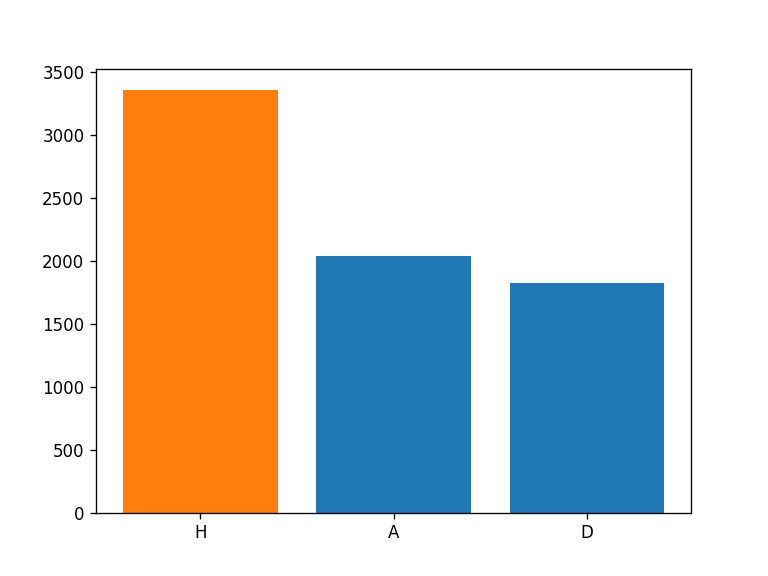

<BarContainer object of 3 artists>

In [173]:
# Plot
fig,ax = plt.subplots()
ax.bar(x=h1_labels,height=h1_values,color=['tab:orange','tab:blue','tab:blue'])

### Hypothesis 2: The team which has won more in the last x matches is more likely to win.

In [315]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [316]:
# Helper functions
def plot_h2(df,n):
    # Categorise by team which won more in the last x matches then count FTR
    h2_df = df.copy()
    h2_df = h2_df.loc[h2_df['Div']=='E0',:] # filter E0
    h2_df['MostWinsPrevN'] = h2_df.apply(func=lambda x: features.prev_n_most_wins(df,x['HomeTeam'],x['AwayTeam'],n,x['Date']),axis=1)
    # Plot data preparation
    h2_df = h2_df.groupby(by=['FTR','MostWinsPrevN']).agg('count').rename(columns={'HomeTeam':'cnt'}).sort_values(by='cnt',ascending=False).cnt.reset_index()
    h2_0_df = h2_df.loc[h2_df['FTR']=='H',:].filter(['MostWinsPrevN','cnt']).set_index('MostWinsPrevN').reindex(['Home','Away','Neither']).cnt
    h2_0_labels = h2_0_df.index.to_numpy()
    h2_0_values = h2_0_df.values
    h2_1_df = h2_df.copy().loc[h2_df['FTR']=='A',:].filter(['MostWinsPrevN','cnt']).set_index('MostWinsPrevN').reindex(['Home','Away','Neither']).cnt
    h2_1_labels = h2_1_df.index.to_numpy()
    h2_1_values = h2_1_df.values
    h2_2_df = h2_df.copy().loc[h2_df['FTR']=='D',:].filter(['MostWinsPrevN','cnt']).set_index('MostWinsPrevN').reindex(['Home','Away','Neither']).cnt
    h2_2_labels = h2_2_df.index.to_numpy()
    h2_2_values = h2_2_df.values
    h2_labels = [h2_0_labels,h2_1_labels,h2_2_labels]
    h2_values = [h2_0_values,h2_1_values,h2_2_values]
    return (h2_labels,h2_values)

In [317]:
# Prepare plot data
h2_prev3_labels,h2_prev3_values = plot_h2(df,3)
h2_prev5_labels,h2_prev5_values = plot_h2(df,5)
h2_prev8_labels,h2_prev8_values = plot_h2(df,8)
h2_prev13_labels,h2_prev13_values = plot_h2(df,13)

<IPython.core.display.Javascript object>


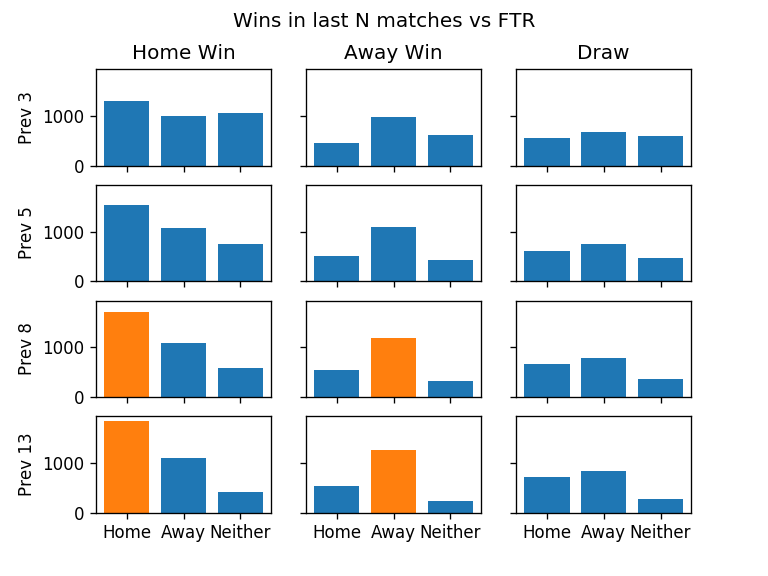

<BarContainer object of 3 artists>

In [318]:
# Plot
fig,axs = plt.subplots(4, 3, sharex=True, sharey=True)
fig.suptitle('Wins in last N matches vs FTR')
# Previous 3 matches
axs[0,0].set_title('Home Win')
axs[0,0].set_ylabel('Prev 3')
axs[0,0].bar(x=h2_prev3_labels[0],height=h2_prev3_values[0])
axs[0,1].set_title('Away Win')
axs[0,1].bar(x=h2_prev3_labels[1],height=h2_prev3_values[1])
axs[0,2].set_title('Draw')
axs[0,2].bar(x=h2_prev3_labels[2],height=h2_prev3_values[2])
# Previous 5 matches
axs[1,0].set_ylabel('Prev 5')
axs[1,0].bar(x=h2_prev5_labels[0],height=h2_prev5_values[0])
axs[1,1].bar(x=h2_prev5_labels[1],height=h2_prev5_values[1])
axs[1,2].bar(x=h2_prev5_labels[2],height=h2_prev5_values[2])
# Previous 8 matches
axs[2,0].set_ylabel('Prev 8')
axs[2,0].bar(x=h2_prev8_labels[0],height=h2_prev8_values[0],color=['tab:orange','tab:blue','tab:blue'])
axs[2,1].bar(x=h2_prev8_labels[1],height=h2_prev8_values[1],color=['tab:blue','tab:orange','tab:blue'])
axs[2,2].bar(x=h2_prev8_labels[2],height=h2_prev8_values[2])
# Previous 13 matches
axs[3,0].set_ylabel('Prev 13')
axs[3,0].bar(x=h2_prev13_labels[0],height=h2_prev13_values[0],color=['tab:orange','tab:blue','tab:blue'])
axs[3,1].bar(x=h2_prev13_labels[1],height=h2_prev13_values[1],color=['tab:blue','tab:orange','tab:blue'])
axs[3,2].bar(x=h2_prev13_labels[2],height=h2_prev13_values[2])

### Hypothesis 3: The team which has one more out of the previous x match-ups is more likely to win

In [326]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [330]:
# Helper functions
def prev_n_matchups(df,homeTeam,awayTeam,n=-1,date=datetime.datetime.today(),homeaway='both'):
    # Filter date
    df = df[(df['Date']<date)]
        # Filter team
    if homeaway == 'home':
        team_mask = (df['HomeTeam']==homeTeam) & (df['AwayTeam']==awayTeam) # home team is home ONLY
    elif homeaway == 'away': 
        team_mask = (df['HomeTeam']==awayTeam) & (df['AwayTeam']==homeTeam) # away team is away ONLY
    else:
        team_mask = (df['HomeTeam']==homeTeam) & (df['AwayTeam']==awayTeam) | (df['HomeTeam']==awayTeam) & (df['AwayTeam']==homeTeam) # include all home and away matches
    df = df[team_mask]
    # Order by desc date
    df = df.sort_values(by='Date',ascending=False)
    # Return n results
    if n>0:
        nrows = df.shape[0]
        df=df.head(min(n,nrows)) # Return first n rows
    return df

def prev_n_matchup_wins(df,homeTeam,awayTeam,n=-1,date=datetime.datetime.today(),homeaway='both'):
    df = prev_n_matchups(df,homeTeam,awayTeam,n,date,homeaway)
    homeTeamWins = prev_n_win(df,homeTeam,date,homeaway)
    awayTeamWins = prev_n_win(df,awayTeam,date,homeaway)
    return cmp_homeaway_val(homeTeamWins,awayTeamWins)

def plot_h3(df,n):
    # Categorise which team had the most wins in previous matches
    h3_df = df.copy()
    h3_df = h3_df.loc[h3_df['Div']=='E0',:] # filter E0
    h3_df['MostMatchupWinsPrevN'] = h3_df.apply(func=lambda x: features.prev_n_matchup_wins(df,x['HomeTeam'],x['AwayTeam'],n,x['Date']),axis=1)
    # Plot data preparation
    h3_df = h3_df.groupby(by=['FTR','MostMatchupWinsPrevN']).agg('count').rename(columns={'HomeTeam':'cnt'}).cnt.reset_index()
    h3_0_df = h3_df.loc[h3_df['FTR']=='H',:].filter(['MostMatchupWinsPrevN','cnt']).set_index('MostMatchupWinsPrevN').reindex(['Home','Away','Neither']).cnt
    h3_0_labels = h3_0_df.index.to_numpy()
    h3_0_values = h3_0_df.values
    h3_1_df = h3_df.loc[h3_df['FTR']=='A',:].filter(['MostMatchupWinsPrevN','cnt']).set_index('MostMatchupWinsPrevN').reindex(['Home','Away','Neither']).cnt
    h3_1_labels = h3_1_df.index.to_numpy()
    h3_1_values = h3_1_df.values
    h3_2_df = h3_df.loc[h3_df['FTR']=='D',:].filter(['MostMatchupWinsPrevN','cnt']).set_index('MostMatchupWinsPrevN').reindex(['Home','Away','Neither']).cnt
    h3_2_labels = h3_2_df.index.to_numpy()
    h3_2_values = h3_2_df.values
    h3_labels = [h3_0_labels,h3_1_labels,h3_2_labels]
    h3_values = [h3_0_values,h3_1_values,h3_2_values]
    return (h3_labels,h3_values)


In [327]:
# Test
features.prev_n_matchups(df,'Chelsea','Man United',5,homeaway='both')

,AwayTeam,Date,Div,FTAG,FTHG,FTR,HomeTeam,Source,Season,AC,AF,AR,AS,AST,AY,HC,HF,HR,HS,HST,HTAG,HTHG,HTR,HY,Referee
7987,Chelsea,2019-04-28,E0,1.0,1.0,D,Man United,football-data-uk,1819,6.0,14.0,0.0,16.0,3.0,2.0,6.0,9.0,0.0,7.0,5.0,1.0,1.0,D,3.0,M Atkinson
7710,Man United,2018-10-20,E0,2.0,2.0,D,Chelsea,football-data-uk,1819,3.0,17.0,0.0,7.0,4.0,5.0,5.0,9.0,0.0,21.0,6.0,0.0,1.0,H,2.0,M Dean
2314,Chelsea,2018-02-25,E0,1.0,2.0,H,Man United,football-data-uk,1718,4.0,12.0,0.0,14.0,7.0,2.0,3.0,13.0,0.0,10.0,5.0,1.0,1.0,D,2.0,M Atkinson
2142,Man United,2017-11-05,E0,0.0,1.0,H,Chelsea,football-data-uk,1718,7.0,20.0,0.0,10.0,2.0,3.0,4.0,16.0,0.0,18.0,8.0,0.0,0.0,D,1.0,A Taylor
15024,Chelsea,2017-04-16,E0,0.0,2.0,H,Man United,football-data-uk,1617,3.0,20.0,0.0,5.0,0.0,3.0,1.0,16.0,0.0,9.0,3.0,0.0,1.0,H,3.0,R Madley


In [328]:
features.prev_n_matchup_wins(df,'Chelsea','Man United',5)

'Away'

In [331]:
# Prepare plot data
h3_prev3_labels,h3_prev3_values = plot_h3(df,3)
h3_prev5_labels,h3_prev5_values = plot_h3(df,5)
h3_prev8_labels,h3_prev8_values = plot_h3(df,8)
h3_prev13_labels,h3_prev13_values = plot_h3(df,13)

<IPython.core.display.Javascript object>


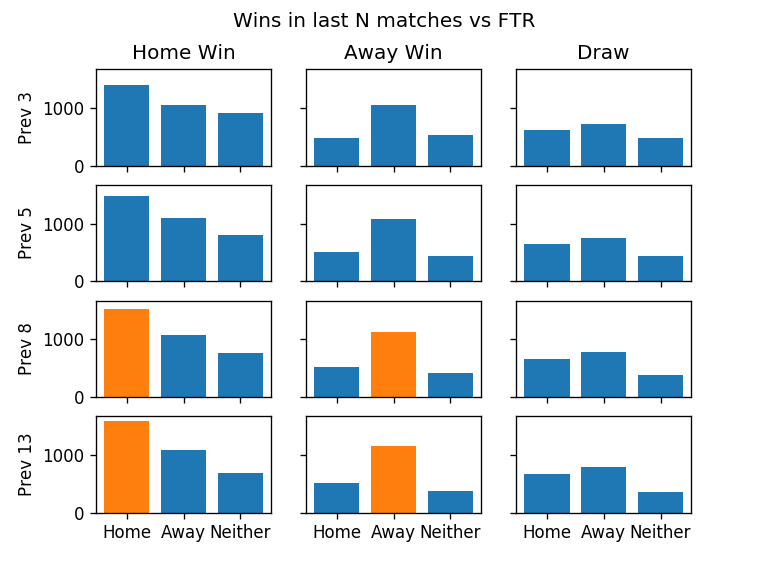

<BarContainer object of 3 artists>

In [332]:
# Plot
fig,axs = plt.subplots(4, 3, sharex=True, sharey=True)
fig.suptitle('Wins in last N matches vs FTR')
# Previous 3 matches
axs[0,0].set_title('Home Win')
axs[0,0].set_ylabel('Prev 3')
axs[0,0].bar(x=h3_prev3_labels[0],height=h3_prev3_values[0])
axs[0,1].set_title('Away Win')
axs[0,1].bar(x=h3_prev3_labels[1],height=h3_prev3_values[1])
axs[0,2].set_title('Draw')
axs[0,2].bar(x=h3_prev3_labels[2],height=h3_prev3_values[2])
# Previous 5 matches
axs[1,0].set_ylabel('Prev 5')
axs[1,0].bar(x=h3_prev5_labels[0],height=h3_prev5_values[0])
axs[1,1].bar(x=h3_prev5_labels[1],height=h3_prev5_values[1])
axs[1,2].bar(x=h3_prev5_labels[2],height=h3_prev5_values[2])
# Previous 8 matches
axs[2,0].set_ylabel('Prev 8')
axs[2,0].bar(x=h3_prev8_labels[0],height=h3_prev8_values[0],color=['tab:orange','tab:blue','tab:blue'])
axs[2,1].bar(x=h3_prev8_labels[1],height=h3_prev8_values[1],color=['tab:blue','tab:orange','tab:blue'])
axs[2,2].bar(x=h3_prev8_labels[2],height=h3_prev8_values[2])
# Previous 13 matches
axs[3,0].set_ylabel('Prev 13')
axs[3,0].bar(x=h3_prev13_labels[0],height=h3_prev13_values[0],color=['tab:orange','tab:blue','tab:blue'])
axs[3,1].bar(x=h3_prev13_labels[1],height=h3_prev13_values[1],color=['tab:blue','tab:orange','tab:blue'])
axs[3,2].bar(x=h3_prev13_labels[2],height=h3_prev13_values[2])

### Hypothesis 4: The result which has occured the most often in a period of x matches is likely to occur again.

In [293]:
# Helper Functions
# Count the number of occurences of a value in an array
def count_occurence(arr,val):
    cnt = 0
    for x in arr:
        if x == val:
            cnt += 1
    return cnt

# Return the most common occuring value in an array
## In case of tie-breaker W > L > D
def most_common_result(arr):
    cnt_win = count_occurence(arr,'W')
    cnt_loss = count_occurence(arr,'L')
    cnt_draw = count_occurence(arr,'D')
    if (cnt_win >= cnt_loss and cnt_win >= cnt_draw):
        return 'W'
    elif (cnt_loss > cnt_win and cnt_loss >= cnt_draw):
        return 'L'
    elif (cnt_draw > cnt_win and cnt_draw > cnt_loss):
        return 'D'
    else:
        return None
    

In [294]:
# Unit testing
assert(most_common_result(['W','W','L','L','D'])=='W')
assert(most_common_result(['W','L','L','D','D'])=='L')
assert(most_common_result(['W','W','D','D','D'])=='D')
assert(most_common_result(['W','W','L','D','D'])=='W')

In [295]:
# Categorise by team which won more in the last x matches then count FTR
h4_df = df.copy()
h4_df = h4_df.loc[h4_df['Div']=='E0',:] # filter E0
h4_df['HomeTeamResultsPrevN'] = h4_df.apply(func=lambda x: features.prev_n_results(df,x['HomeTeam'],5,x['Date']),axis=1)
h4_df['HomeTeamFreqResultsPrevN'] = h4_df.apply(func=lambda x: most_common_result(x['HomeTeamResultsPrevN']),axis=1)
h4_df['AwayTeamResultsPrevN'] = h4_df.apply(func=lambda x: features.prev_n_results(df,x['AwayTeam'],5,x['Date']),axis=1)
h4_df['AwayTeamFreqResultsPrevN'] = h4_df.apply(func=lambda x: most_common_result(x['AwayTeamResultsPrevN']),axis=1)
h4_df # Show

,AwayTeam,Date,Div,FTAG,FTHG,FTR,HomeTeam,Source,Season,AC,AF,AR,AS,AST,AY,HC,HF,HR,HS,HST,HTAG,HTHG,HTR,HY,Referee,HomeTeamResultsPrevN,HomeTeamFreqResultsPrevN,AwayTeamResultsPrevN,AwayTeamFreqResultsPrevN
0,Aston Villa,2015-08-08,E0,1.0,0.0,A,Bournemouth,football-data-uk,1516,3.0,13.0,0.0,7.0,3.0,4.0,6.0,13.0,0.0,11.0,2.0,0.0,0.0,D,3.0,M Clattenburg,"[W, W, D, W, W]",W,"[L, L, W, W, L]",L
1,Swansea,2015-08-08,E0,2.0,2.0,D,Chelsea,football-data-uk,1516,8.0,16.0,0.0,18.0,10.0,3.0,4.0,15.0,1.0,11.0,3.0,1.0,2.0,H,1.0,M Oliver,"[W, L, D, W, W]",W,"[L, L, W, W, W]",W
2,Watford,2015-08-08,E0,2.0,2.0,D,Everton,football-data-uk,1516,2.0,13.0,0.0,11.0,5.0,2.0,8.0,7.0,0.0,10.0,5.0,1.0,0.0,A,1.0,M Jones,"[L, W, L, L, W]",L,"[D, W, W, W, W]",W
3,Sunderland,2015-08-08,E0,2.0,4.0,H,Leicester,football-data-uk,1516,3.0,17.0,0.0,10.0,5.0,4.0,6.0,13.0,0.0,19.0,8.0,0.0,3.0,H,2.0,L Mason,"[W, D, W, W, L]",W,"[L, D, D, W, W]",W
4,Tottenham,2015-08-08,E0,0.0,1.0,H,Man United,football-data-uk,1516,2.0,12.0,0.0,9.0,4.0,3.0,1.0,12.0,0.0,9.0,1.0,0.0,1.0,H,2.0,J Moss,"[D, D, W, L, L]",L,"[W, W, L, L, D]",W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17703,Fulham,2008-05-11,E0,1.0,0.0,A,Portsmouth,football-data-uk,0708,6.0,11.0,0.0,7.0,4.0,0.0,5.0,13.0,0.0,15.0,10.0,0.0,0.0,D,0.0,M Clattenburg,"[L, L, L, D, W]",L,"[W, W, L, W, L]",W
17704,Arsenal,2008-05-11,E0,1.0,0.0,A,Sunderland,football-data-uk,0708,4.0,12.0,0.0,12.0,8.0,1.0,3.0,14.0,0.0,13.0,5.0,1.0,0.0,A,1.0,K Stroud,"[L, W, L, L, W]",L,"[W, W, W, L, D]",W
17705,Liverpool,2008-05-11,E0,2.0,0.0,A,Tottenham,football-data-uk,0708,4.0,9.0,0.0,18.0,12.0,1.0,8.0,11.0,0.0,6.0,3.0,0.0,0.0,D,1.0,U Rennie,"[W, D, D, D, D]",D,"[W, D, W, W, D]",W
17706,Aston Villa,2008-05-11,E0,2.0,2.0,D,West Ham,football-data-uk,0708,8.0,21.0,0.0,13.0,8.0,2.0,7.0,9.0,0.0,16.0,8.0,1.0,1.0,D,2.0,M Dean,"[L, D, W, L, L]",L,"[L, D, W, W, W]",W


In [303]:
# Plot data preparation
h4_h_df = h4_df.groupby(by=['FTR','HomeTeamFreqResultsPrevN']).agg('count').rename(columns={'HomeTeam':'cnt'}).cnt.reset_index()
h4_h0_df = h4_h_df.loc[h4_h_df['FTR']=='H',:].filter(['HomeTeamFreqResultsPrevN','cnt']).set_index('HomeTeamFreqResultsPrevN').reindex(['W','L','D']).cnt
h4_h0_labels = h4_h0_df.index.to_numpy()
h4_h0_values = h4_h0_df.values
h4_h1_df = h4_h_df.loc[h4_h_df['FTR']=='A',:].filter(['HomeTeamFreqResultsPrevN','cnt']).set_index('HomeTeamFreqResultsPrevN').reindex(['W','L','D']).cnt
h4_h1_labels = h4_h1_df.index.to_numpy()
h4_h1_values = h4_h1_df.values
h4_h2_df = h4_h_df.loc[h4_h_df['FTR']=='D',:].filter(['HomeTeamFreqResultsPrevN','cnt']).set_index('HomeTeamFreqResultsPrevN').reindex(['W','L','D']).cnt
h4_h2_labels = h4_h2_df.index.to_numpy()
h4_h2_values = h4_h2_df.values
h4_h_labels = [h4_h0_labels,h4_h1_labels,h4_h2_labels]
h4_h_values = [h4_h0_values,h4_h1_values,h4_h2_values]

h4_a_df = h4_df.groupby(by=['FTR','AwayTeamFreqResultsPrevN']).agg('count').rename(columns={'HomeTeam':'cnt'}).cnt.reset_index()
h4_a0_df = h4_a_df.loc[h4_a_df['FTR']=='H',:].filter(['AwayTeamFreqResultsPrevN','cnt']).set_index('AwayTeamFreqResultsPrevN').reindex(['W','L','D']).cnt
h4_a0_labels = h4_a0_df.index.to_numpy()
h4_a0_values = h4_a0_df.values
h4_a1_df = h4_a_df.loc[h4_a_df['FTR']=='A',:].filter(['AwayTeamFreqResultsPrevN','cnt']).set_index('AwayTeamFreqResultsPrevN').reindex(['W','L','D']).cnt
h4_a1_labels = h4_a1_df.index.to_numpy()
h4_a1_values = h4_a1_df.values
h4_a2_df = h4_a_df.loc[h4_a_df['FTR']=='D',:].filter(['AwayTeamFreqResultsPrevN','cnt']).set_index('AwayTeamFreqResultsPrevN').reindex(['W','L','D']).cnt
h4_a2_labels = h4_a2_df.index.to_numpy()
h4_a2_values = h4_a2_df.values
h4_a_labels = [h4_a0_labels,h4_a1_labels,h4_a2_labels]
h4_a_values = [h4_a0_values,h4_a1_values,h4_a2_values]

<IPython.core.display.Javascript object>


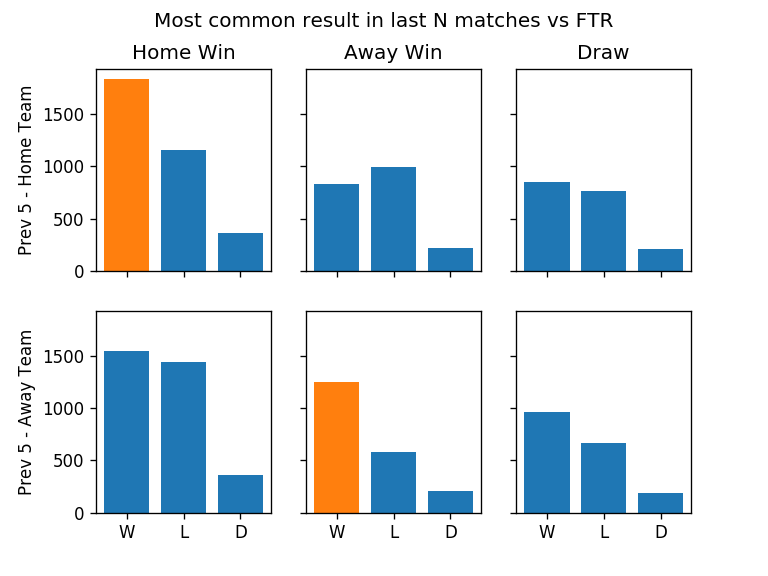

<BarContainer object of 3 artists>

In [308]:
# Plot
fig,axs = plt.subplots(2, 3, sharex=True, sharey=True)
fig.suptitle('Most common result in last N matches vs FTR')
# Previous 5 home matches
axs[0,0].set_title('Home Win')
axs[0,0].set_ylabel('Prev 5 - Home Team')
axs[0,0].bar(x=h4_h_labels[0],height=h4_h_values[0],color=['tab:orange','tab:blue','tab:blue'])
axs[0,1].set_title('Away Win')
axs[0,1].bar(x=h4_h_labels[1],height=h4_h_values[1])
axs[0,2].set_title('Draw')
axs[0,2].bar(x=h4_h_labels[2],height=h4_h_values[2])
axs[1,0].set_ylabel('Prev 5 - Away Team')
axs[1,0].bar(x=h4_a_labels[0],height=h4_a_values[0])
axs[1,1].bar(x=h4_a_labels[1],height=h4_a_values[1],color=['tab:orange','tab:blue','tab:blue'])
axs[1,2].bar(x=h4_a_labels[2],height=h4_a_values[2])